# 1. Importing libraries

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# 2. Reading in dataset

In [78]:
df = pd.read_csv('df_binary.csv',index_col=0)
df.head()

,Longitude,Latitude,Status,Address Type,Severity Description,Collision Type,Number of People Involved,Number of Pedestrians Involved,Number of Bicycles Involved,Number of Vehicles Involved,...,Month,Date,Hour,Minute,Speed,Road Congestion,Road Length,Neighborhood,Num People Square,Day of the Week
0,-122.292141,47.536087,Matched,Block,Not Severe,Sideswipe,2,0,0,2,...,12,12,15,49,48.0,2.36674,0.56104,Riverton,4,Wednesday
1,-122.335422,47.598752,Matched,Block,Not Severe,Other,1,0,0,1,...,12,16,2,44,85.0,-1.00000,0.36276,Seattle,1,Sunday
2,-122.331579,47.598746,Matched,Block,Not Severe,Sideswipe,2,0,0,2,...,12,17,13,26,13.0,-1.00000,0.36276,Seattle,4,Monday
3,-122.334188,47.571578,Matched,Block,Not Severe,Other,2,0,0,1,...,12,20,2,25,58.0,0.00000,1.73291,Seattle,4,Thursday
5,-122.337348,47.520472,Matched,Block,Not Severe,Sideswipe,2,0,0,2,...,12,14,17,33,55.0,1.57819,0.74738,White Center,4,Friday


# 3. Inference for comparing categorical variables using Chi-squared distribution

Since the chi-squared distribution is used to test the hypothesis whether two categorical variables are independent, we can use this statistical method for comparing every categorical explanatory variable in our dataset with the severity target variable in order to establish an inference. 

### a. Day of the Week and Severity

**Question**: Is there a relation between the hour variable and severity. Can the pattern of collisions during the day explain the variability in severity? 

**Null hypothesis**: Severity and rate of collisions during certain days of the week are independent. 

**Alternatve hypothesis**: Severity and rate of collisions during certain days of the week are not independent.

For our analysis, we pick a confidence level of 5% or 0.05. 

**Significance level**: 5%

Here we will analyze the given sample data to compute

- Degree of freedom
- Expected Frequency Count of sample variable
- Calculate Chi-Square test static value

Below we create a function that takes in a categorical variable from the dataset to be compared with the severity variable using a chi-squared hypothesis test for independence. The function creates a contingency table for the two categorical variables. 

From the contingency table, the degrees of freedom and expected values can be determined. The function finally returns the degrees of freedom and the chi-squared statistic which can be further used to calculate the p-value for statistical inference. 

**Degrees of freedom (df)**: (r-1) x (c-1)

*r*: number of rows in the table above

*c*: number of columns in the table above

df = 6

*Eij (expected values)* = (ith row total X jth column total) / grand total

**Calculating Chi-squares**

Summation(((Oi-Ei)^2)/Ei)

Χ² = Σ [ (Oi,j — Ei,j)² / Ei,j ]

O: Observed value
E: Expected value

In [79]:
def chi_sq_cat(var):
    df_pivot = pd.pivot_table(df[[var,'Severity Description','Latitude']],index=var,columns='Severity Description',aggfunc='count')
    df_pivot['Row Total'] = df_pivot[('Latitude','Not Severe')] + df_pivot[('Latitude','Severe')]
    new_row = df_pivot.apply(sum)
    df_pivot = df_pivot.append(pd.DataFrame([new_row]))
    print (df_pivot)
    print ()
    
    dof = (df_pivot.shape[0]-2)*(df_pivot.shape[1]-2)

    exp_vals = []
    for i in range(df_pivot.shape[0]):
        for j in range(df_pivot.shape[1]):
            exp_vals.append((df_pivot.iloc[i,df_pivot.shape[1]-1]*df_pivot.iloc[df_pivot.shape[0]-1,j])/205394)

    exp_vals = np.array(exp_vals).reshape(df_pivot.shape[0],df_pivot.shape[1])
    print ("Expected values: ",exp_vals)
    print ()

    chi = []
    for i in range(df_pivot.shape[0]):
        for j in range(df_pivot.shape[1]):
            chi.append(np.square((df_pivot.iloc[i,j] - exp_vals[i,j]))/exp_vals[i,j])
    chi = np.sum(chi)
    print ("Chi-squared value: ",chi)
    print ("Degrees of freedom: ",dof)
    return dof,chi

In [191]:
#Retrieving the chi-squared value and degrees of freedom using the chi_sq_cat function
chi,dof = chi_sq_cat("Day of the Week")
chi,dof

                       Latitude        Row Total
Severity Description Not Severe Severe          
Friday                    33289    544     33833
Monday                    27494    414     27908
Saturday                  28290    442     28732
Sunday                    22632    384     23016
Thursday                  30546    518     31064
Tuesday                   29694    469     30163
Wednesday                 30090    463     30553
0                        202035   3234    205269

Expected values:  [[ 33279.6973378     532.71235771  33812.40969551]
 [ 27451.59439906    439.42117102  27891.01557008]
 [ 28262.11875712    452.39533774  28714.51409486]
 [ 22639.59784609    362.39492877  23001.99277486]
 [ 30555.98138212    489.1134892   31045.09487132]
 [ 29669.71627701    474.92693068  30144.64320769]
 [ 30053.3382426     481.06761639  30534.40585898]
 [201912.0442418    3232.0318315  205144.0760733 ]]

Chi-squared value:  6.089519077030023
Degrees of freedom:  6


(6, 6.089519077030023)

The P-Value is 0.456377 and was determined using an online chi-square calculator. This can also be determined manually and using Python. 

Since our p-value is not significant (more than 0.05), we cannot reject the null hypothesis. There is no sufficient evidence to indicate that severity is not independent of day of the week. 

In [ ]:
plt.plot(scipy.stats.chi2

### b. Month vs Severity 

In [192]:
chi,dof = chi_sq_cat("Month")
chi,dof

                       Latitude        Row Total
Severity Description Not Severe Severe          
1                         16756    266     17022
2                         14761    216     14977
3                         16683    285     16968
4                         16655    246     16901
5                         17724    262     17986
6                         17457    257     17714
7                         17477    326     17803
8                         17311    326     17637
9                         16189    257     16446
10                        17976    294     18270
11                        16793    268     17061
12                        16253    231     16484
0                        202035   3234    205269

Expected values:  [[ 16743.62332882    268.01731307  17011.64064189]
 [ 14732.06712465    235.81807648  14967.88520113]
 [ 16690.50644128    267.16706428  16957.67350556]
 [ 16624.60215488    266.11212596  16890.71428085]
 [ 17691.85813607    283.19582851  17975.0

(11, 27.57330727823013)

p-value: 0.004

A p-value less than the significance level indicates that severity and collision patterns across months are not independent. This would indicate that there could be some relation between severity and month. 

### c. Hour vs Severity

In [82]:
chi,dof = chi_sq_cat("Hour")
chi,dof

                       Latitude        Row Total
Severity Description Not Severe Severe          
0                         52119    585     52704
1                          3201     96      3297
2                          3369     83      3452
3                          1533     41      1574
4                          1128     30      1158
5                          1514     34      1548
6                          2966     80      3046
7                          6061    121      6182
8                          7933    107      8040
9                          7485    106      7591
10                         6935     95      7030
11                         7662    114      7776
12                         9692    133      9825
13                         9646    136      9782
14                        10009    159     10168
15                        10858    169     11027
16                        11434    204     11638
17                        12166    233     12399
18                  

(23, 249.58026356351564)

The P-Value is < .00001

For the hour variable, the p-value has a very low value indicating that the alternate hypothesis in this case is statistically significant, which in return indicates a possible strong relationship between severity and hour. 

### d. Date vs Severity

In [83]:
chi,dof = chi_sq_cat("Date")
chi,dof

                       Latitude        Row Total
Severity Description Not Severe Severe          
1                          6892    121      7013
2                          6747    101      6848
3                          6623    106      6729
4                          6563    111      6674
5                          6865    111      6976
6                          6747    106      6853
7                          6698     93      6791
8                          6831    102      6933
9                          6810     98      6908
10                         6785    114      6899
11                         6663    121      6784
12                         6708    104      6812
13                         6792    114      6906
14                         6688    105      6793
15                         6936    116      7052
16                         6558     95      6653
17                         6548    114      6662
18                         6639     99      6738
19                  

(30, 14.236478158845035)

p-value:0.99

Since 0.99 is not statistically significant, this indicates that the association between severity and date might be weak. 

### e. Address Type

In [84]:
chi,dof = chi_sq_cat("Address Type")
chi,dof

                       Latitude        Row Total
Severity Description Not Severe Severe          
Block                    135374   1597    136971
Intersection              66785   1638     68423
0                        202159   3235    205394

Expected values:  [[134813.67707431   2157.32292569 136971.        ]
 [ 67345.32292569   1077.67707431  68423.        ]
 [202159.           3235.         205394.        ]]

Chi-squared value:  443.85583998604875
Degrees of freedom:  1


(1, 443.85583998604875)

The P-Value is < .00001

This p-value indicates statistical significance and also indicates a strong relationship between severity and address type.

### f. Junction Type

In [85]:
chi,dof = chi_sq_cat("Junction Type")
chi,dof

                                                    Latitude        Row Total
Severity Description                              Not Severe Severe          
At Intersection (but not related to intersection)       2409     27      2436
At Intersection (intersection related)                 64136   1605     65741
Driveway Junction                                      10931    142     11073
Mid-Block (but intersection related)                   23481    198     23679
Mid-Block (not related to intersection)                93011   1243     94254
Ramp Junction                                            161      3       164
Unknown                                                 8030     17      8047
0                                                     202159   3235    205394

Expected values:  [[2.39763247e+03 3.83675278e+01 2.43600000e+03]
 [6.47055650e+04 1.03543499e+03 6.57410000e+04]
 [1.08985979e+04 1.74402149e+02 1.10730000e+04]
 [2.33060506e+04 3.72949380e+02 2.36790000e+04]
 [9.27694

(6, 547.7693255605093)

The P-Value is < .00001

Another low p-value indicates a possibly strong relationship between severity and junction type.

## 4. Inference for comparing severity with numerical variables

To compare numberical variables against severity, the severe and not severe categories are separated for each numerical variable and the datasets compared to see if there is a relation. 

There are three different techniques we can adopt to perform this sort of statistical inference: 
- **Bootstrap sampling simulations** - sampling with replacement
- **Normal distribution sampling simulations** - assumes data is normally distributed
- **Permutation sampling simulations** - no prior assumption regarding distribution of data

First we separate the dataset into severe and not severe datasets for comparison.

In [183]:
df = df[df['Road Length']<500]
df_sev = df[df['Severity Description']=='Severe']
df_not_sev = df[df['Severity Description']=='Not Severe']

Below we create functions to extract means of simulated samples for each method described above. We use 10,000 random samples and use the mean. 

In [163]:
def bs_samples_mean(data):
    bs_sample = np.random.choice(data,len(data))
    bs_sample_mean = np.mean(bs_sample)
    return bs_sample_mean

def bs_rep_mean(data):
    rep_mean = np.mean(np.random.choice(data,10000))
    return rep_mean

def norm_mean(data):
    est_mean = np.mean(np.random.normal(np.mean(data),np.std(data),10000))
    return est_mean

We use the *speed* variable to test all three sampling methods to see if there is one that makes more sense. 

### Using bootstrap samples

P value:  0.0
CI interval:  [-0.47024822  0.47356178]


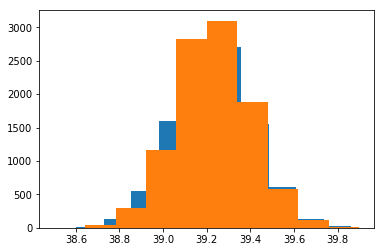

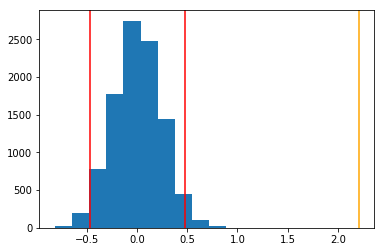

In [196]:
#Calculating difference of means between severe and non-severe samples
diff_mean = np.mean(df_sev['Speed']) - np.mean(df_not_sev['Speed'])

#Calculating the combined mean of the 2 samples
combined_mean = np.mean(pd.Series(np.concatenate((df_sev['Speed'],df_not_sev['Speed']))).dropna())

#Shifting the 2 samples by the combined mean to make the two means the same for the null hypothesis case
sev_shifted = pd.Series(df_sev['Speed'] - np.mean(df_sev['Speed']) + combined_mean).dropna()
nonsev_shifted = pd.Series(df_not_sev['Speed'] - np.mean(df_not_sev['Speed']) + combined_mean).dropna()

#Calculating the mean for 10000 extracted bootstrap samples
sev_rep = [bs_rep_mean(sev_shifted) for i in range(10000)]
nonsev_rep = [bs_rep_mean(nonsev_shifted) for i in range(10000)]

#Calculating the difference in mean between the severe and non-severe samples
diff_rep_mean = np.array(sev_rep) - np.array(nonsev_rep)

#Manually calculating the p-value
p_value = np.sum(diff_rep_mean>=diff_mean)/len(diff_rep_mean)
print ("P value: ",p_value)

print ("CI interval: ",np.percentile(diff_rep_mean,(2.5,97.5)))

#Plotting the two sampling distributions to make sure the means are similar
plt.figure()
plt.hist(sev_rep)
plt.hist(nonsev_rep)

#Visualizing the 95% confidence intervals and the observed mean
plt.figure()
plt.hist(diff_rep_mean)
plt.axvline(np.percentile(diff_rep_mean,(2.5,97.5))[0],color='red')
plt.axvline(np.percentile(diff_rep_mean,(2.5,97.5))[1],color='red')
plt.axvline(diff_mean,color='orange')

Looking at the data above, the observed difference between the two means appears to be an outlier falling outside the confidence interval of the sampled distribution. 

The p-value is statistically significant which further indicates that given the null hypothesis that the difference of mean is centered around 0, the probability of seeing the observed difference of mean is unusual. 

### Using normal distribution

The normal dsitribution sampling works the exact same way as the bootstrap method but the samples extracted from a normal distributed as opposed to the extracting samples from the observed sample with replacement. 

P value:  0.0


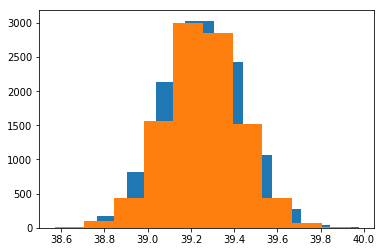

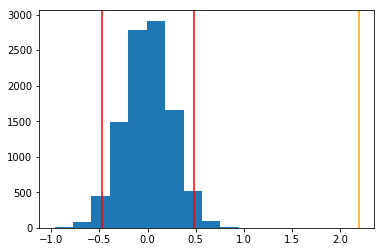

In [164]:
diff_mean = np.mean(df_sev['Speed']) - np.mean(df_not_sev['Speed'])

combined_mean = np.mean(pd.Series(np.concatenate((df_sev['Speed'],df_not_sev['Speed']))).dropna())

sev_shifted = pd.Series(df_sev['Speed'] - np.mean(df_sev['Speed']) + combined_mean).dropna()
nonsev_shifted = pd.Series(df_not_sev['Speed'] - np.mean(df_not_sev['Speed']) + combined_mean).dropna()

sev_rep = [norm_mean(sev_shifted) for i in range(10000)]
nonsev_rep = [norm_mean(nonsev_shifted) for i in range(10000)]

diff_rep_mean = np.array(sev_rep) - np.array(nonsev_rep)

p_value = np.sum(diff_rep_mean>=diff_mean)/len(diff_rep_mean)
print ("P value: ",p_value)

plt.figure()
plt.hist(sev_rep)
plt.hist(nonsev_rep)

plt.figure()
plt.hist(diff_rep_mean)
plt.axvline(np.percentile(diff_rep_mean,(2.5,97.5))[0],color='red')
plt.axvline(np.percentile(diff_rep_mean,(2.5,97.5))[1],color='red')
plt.axvline(diff_mean,color='orange')

The results using the normal distribution is very similar to that of the bootstrap method. 

### Using permutation replicates

Below, we create functions to compute the permutation samples used for the statistical inference. 

This method first combines the two sets of data and then randomly sorts the data. After that, the data is separated into 2 permutation samples with sizes same as the original two sets. 

The next few steps are similar to the previous methods. 10000 samples are taken and the differences of means recorded which is then used to compare to the observed difference in mean. 

In [167]:
def permutation_sample(data1,data2):
    data = pd.Series(np.concatenate((data1,data2))).dropna()
    perm_data = np.random.permutation(data)
    perm_sample_1 = perm_data[:len(data1)]
    perm_sample_2 = perm_data[len(data1):]
    return perm_sample_1,perm_sample_2
    
def draw_perm_reps(data1,data2,func,size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1,perm_sample_2 = permutation_sample(data1,data2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
    return perm_replicates

def diff_of_means(data1,data2):
    diff = np.mean(data1) - np.mean(data2)
    return diff

P value:  0.0
Confidence interval:  [-0.59543113  0.5921862 ]


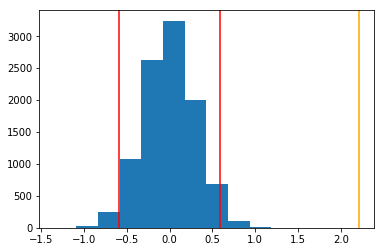

In [198]:
diff_mean = np.mean(df_sev['Speed']) - np.mean(df_not_sev['Speed'])
perm_replicates = draw_perm_reps(df_sev['Speed'],df_not_sev['Speed'],diff_of_means,size=10000)
p_value = np.sum(perm_replicates>=diff_mean)/len(perm_replicates)
print ("P value: ",p_value)
print ("Confidence interval: ",np.percentile(perm_replicates,(2.5,97.5)))

plt.hist(perm_replicates)
plt.axvline(np.percentile(perm_replicates,(2.5,97.5))[0],color='red')
plt.axvline(np.percentile(perm_replicates,(2.5,97.5))[1],color='red')
plt.axvline(diff_mean,color='orange')

In [185]:
st.ttest_ind(pd.Series(df_sev['Speed']).dropna(),pd.Series(df_not_sev['Speed']).dropna())

Ttest_indResult(statistic=7.34565024824843, pvalue=2.0551699867223638e-13)

Above, we determine the p-value to be a really low value indicating that we can reject the null hypothesis similar to the first 2 methods. 

The p-value is also determined using a 2 sided t-test just to verify our results. In this case, the p-value comes out to be 2.0551699867223638e-13 which once again allows us to reject the null hypothesis. 

As a result, we can conclude that the difference in means between severe and not severe collisions for the speed variable is significant. That further indicates that there could be a possible relation between severity and speed.

At the end, we opt for the permutation sampling method as it doesn't have any prior assumptions about the distribution of the data and gives a similar result to the random normal sampling and the bootstrap sampling. 

### Road Length

P value:  0.1344
Confidence interval:  [-0.01689978  0.01673306]


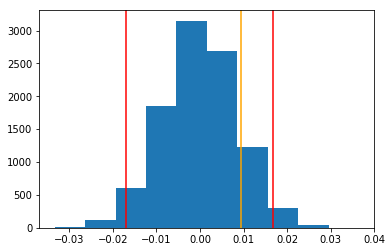

In [199]:
diff_mean = np.mean(df_sev['Road Length']) - np.mean(df_not_sev['Road Length'])
perm_replicates = draw_perm_reps(df_sev['Road Length'],df_not_sev['Road Length'],diff_of_means,size=10000)
p_value = np.sum(perm_replicates>=diff_mean)/len(perm_replicates)
print ("P value: ",p_value)
print ("Confidence interval: ",np.percentile(perm_replicates,(2.5,97.5)))

plt.hist(perm_replicates)
plt.axvline(np.percentile(perm_replicates,(2.5,97.5))[0],color='red')
plt.axvline(np.percentile(perm_replicates,(2.5,97.5))[1],color='red')
plt.axvline(diff_mean,color='orange')

In [186]:
st.ttest_ind(pd.Series(df_sev['Road Length']).dropna(),pd.Series(df_not_sev['Road Length']).dropna())

Ttest_indResult(statistic=1.0822684106912241, pvalue=0.2791345496059145)

For the road length variable, the p-value is greater than the significance level of 0.05 indicating that the result is not statistically significant and that this variable might not explain the variability in severity too well. 

### Road Congestion

P value:  0.0
Confidence interval:  [-0.05977597  0.06077795]


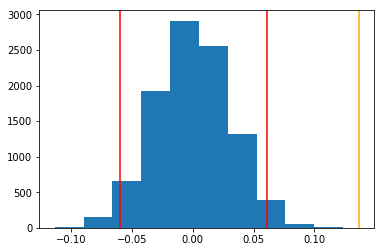

In [200]:
diff_mean = np.mean(df_sev['Road Congestion']) - np.mean(df_not_sev['Road Congestion'])
perm_replicates = draw_perm_reps(df_sev['Road Congestion'],df_not_sev['Road Congestion'],diff_of_means,size=10000)
p_value = np.sum(perm_replicates>=diff_mean)/len(perm_replicates)
print ("P value: ",p_value)
print ("Confidence interval: ",np.percentile(perm_replicates,(2.5,97.5)))

plt.hist(perm_replicates)
plt.axvline(np.percentile(perm_replicates,(2.5,97.5))[0],color='red')
plt.axvline(np.percentile(perm_replicates,(2.5,97.5))[1],color='red')
plt.axvline(diff_mean,color='orange')

In [188]:
st.ttest_ind(pd.Series(df_sev['Road Congestion']).dropna(),pd.Series(df_not_sev['Road Congestion']).dropna())

Ttest_indResult(statistic=4.4451238208053985, pvalue=8.788719042660868e-06)

The p-value for the road congestion variable is 8.788719042660868e-06 which is the probability of observing a value as extreme as the observed difference in mean if the null hypothesis was true. Since the p-value is statistically significant, we can reject the null hypothesis. 

# 5. Conclusion

Statistically significant variables: 
- Month
- Hour
- Address Type
- Junction Type
- Speed 
- Road Congestion